<div align="center">
<a href="https://vbti.nl"><img src="images/vbti_logo.png" width="400"></a>
</div>

# Credit Card Fraud Detection
This notebook supports the 1-day masterclass "Machine Learning". It is not ment as a full course on machine learning, but rather gives you a flavor of the topic. For an in-depth training or consultancy please contact [VBTI](https://vbti.nl). 

For credit card companies it is important to recognize fraudulent credit card transactions, so customers are not charged for items they did not purchase. Using a real-world (but anonymized) data set from [Kaggle](https://www.kaggle.com/mlg-ulb/creditcardfraud/home), several classifiers will be build to predict whether a credit card transaction is fraudulent or not.

In [1]:
# import some default libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data preparation
In this example the Credit Card Fraud Detection dataset from [Kaggle](https://www.kaggle.com/mlg-ulb/creditcardfraud/home) will be used. 

>The dataset contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.


First, the data set is imported into a pandas DataFrame and some data exploration is done.

In [2]:
# read csv file into pandas DataFrame
data = pd.read_csv('./datasets/creditcard.csv')

In [3]:
# show the first 5 rows
data.head(5)

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

The dataset contains 31 features. The V1 up to V28 are the anonymized features and are the result of a Principal Component Analysis (PCA) transformation.

>Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [4]:
data.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.537294e-16  7.959909e-16  5.367590e-16  4.458112e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   1.453003e-15  1.699104e-15 -3.660161e-16 -1.206049e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

In [5]:
# Normalize the Amount feature and drop the Time feature, as we will not use this feature
from sklearn.preprocessing import StandardScaler

data['normalizedAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
data = data.drop(['Time', 'Amount'],axis=1)

In [6]:
# define independent and dependent variables for training the ML algorithms
X = data.iloc[:, data.columns != 'Class'].values
y = data.iloc[:, data.columns == 'Class'].values.ravel()

# check shape of vectors
X.shape, y.shape

((284807, 29), (284807,))

In [7]:
# create training and validation set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0, stratify=y)

## Visualization

By visualizing the data you get a better intuition of the data. Standard python libraries such as [matplotlib](https://matplotlib.org) and [seaborn](https://seaborn.pydata.org/index.html) are used for data visualization.

Plotting a **histrogram** of a variable helps in understanding the range and distribution of values of that variable.

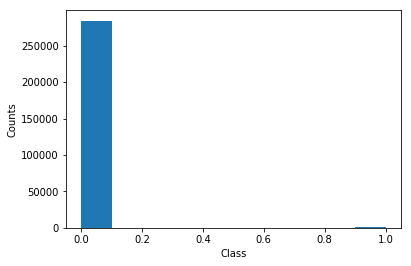

In [8]:
# plot histogram of dependent variable 'Class'
data['Class'].hist()
plt.xlabel('Class')
plt.ylabel('Counts')
plt.grid(False)

By plotting a [boxplot](https://en.wikipedia.org/wiki/Box_plot) for every feature, a first analysis can be done of identifiying features correlating with fraudulent transactions. 

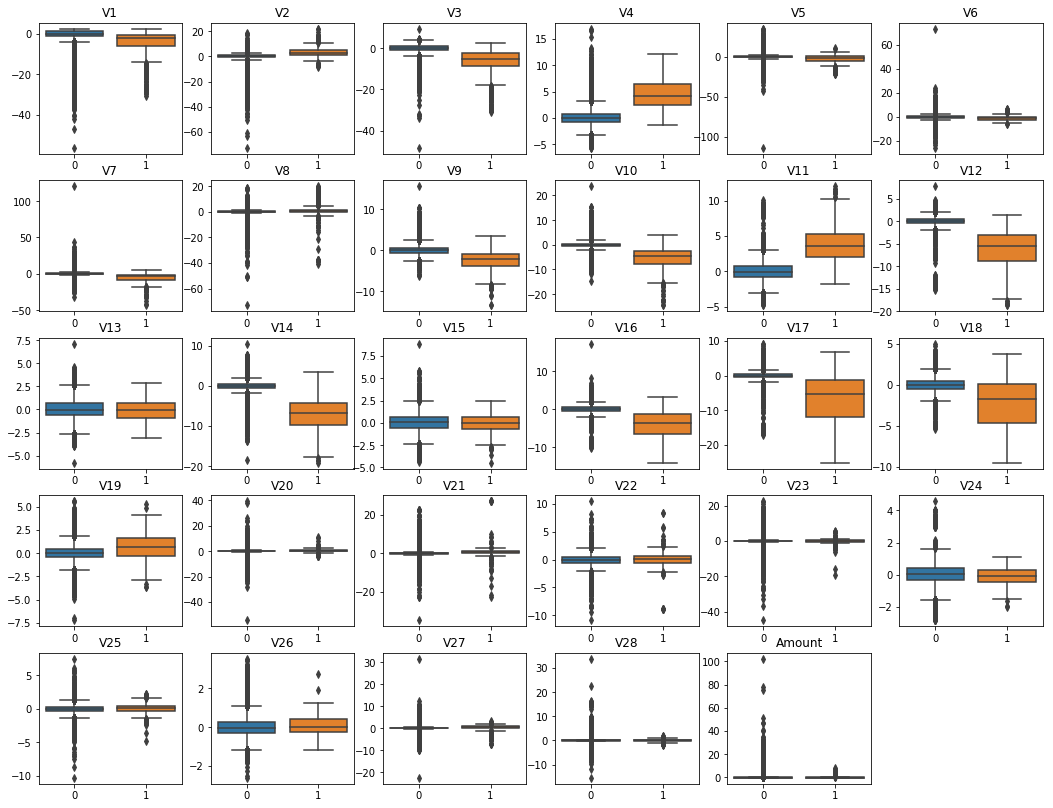

In [9]:
fig, axs = plt.subplots(5, 6, figsize=(18, 14))
axs = axs.ravel()

# create list with feature names
feature_names = ["V{}".format(i+1) for i in range(28)] + ["Amount"]

# plot features
for i in range(X.shape[1]):
    sns.boxplot(x=y, y=X[:,i], data=data, ax=axs[i])
    axs[i].set_title(feature_names[i])
    
# remove empty plot
fig.delaxes(axs.flatten()[-1])

From the boxplot is it estimated that the following features might correlate with fraudulent transactions: V4, V10, V11, V14, V17. By plotting a scatterplot of these features more insight might be obtained.

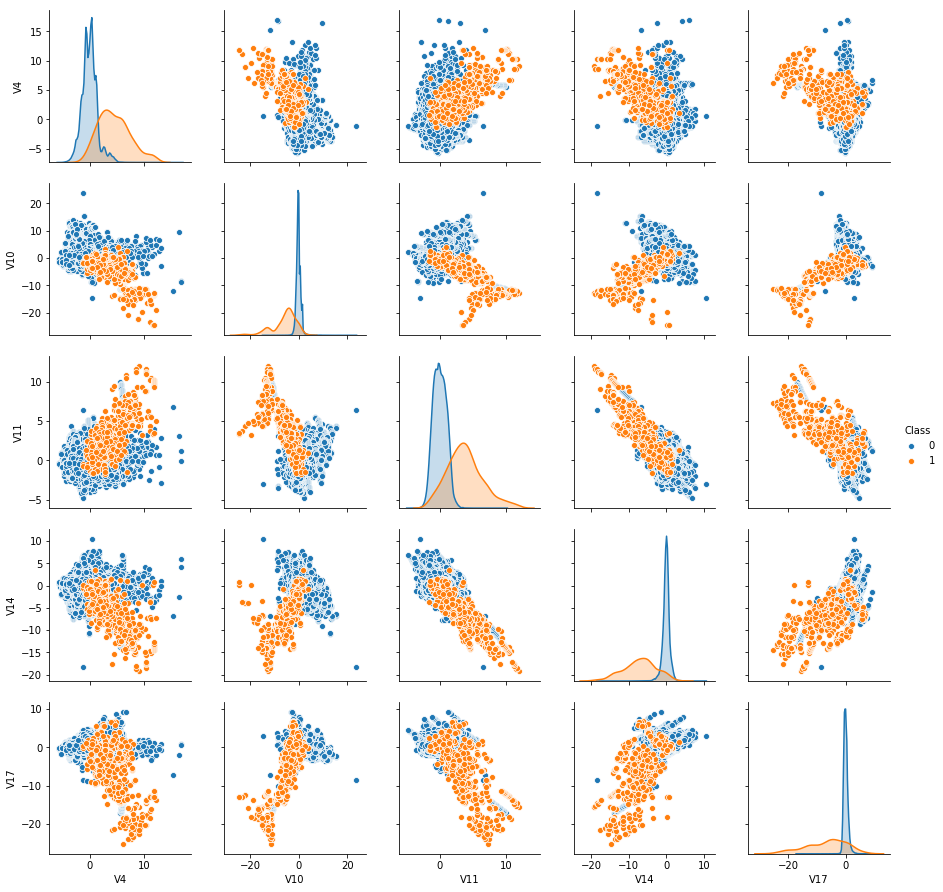

In [11]:
# use seaborn's pairplot to plot scatter plots for all feature combinations
selected_features = [feature_names[i] for i in [3, 9, 10, 13, 16]]
sns.pairplot(data, vars=selected_features, hue='Class');

To verify whether our intuition is right, we also create scatterplots of features that we did not selected as correlating with fraudulent transactions.

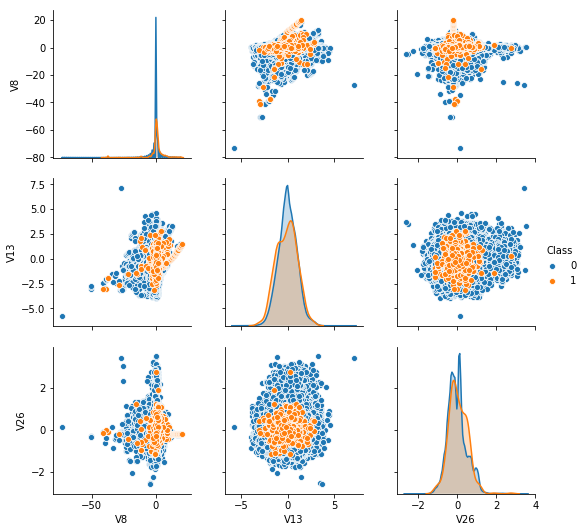

In [12]:
# use seaborn's pairplot to plot scatter plots for all feature combinations
selected_features = [feature_names[i] for i in [7, 12, 25]]
sns.pairplot(data, vars=selected_features, hue='Class');

What is important to notice from these plots is whether the two classes can be separated. Clearly, the two classes seem to be better separable in the plot with features we identified as 'correlating' than in the second plot with non-correlating features.

As relations between features might by highly nonlinear, identifying correlating features using a visual approach is not always the best approach. In stead, try to train nonlinear models and determine the performance on the validation set.

# Baseline model

We first create a baseline model using the Support Vector Machine (SVM) algorithm.

In [ ]:
from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(X_train, y_train)

In [ ]:
# plot confusion matrix
from sklearn.metrics import confusion_matrix
from utils import plot_confusion_matrix, accuracy

y_train_pred = model.predict(X_train)
cm_train = confusion_matrix(y_train, y_train_pred)
plot_confusion_matrix(cm_train, [0,1], title='Training - accuracy: {:.2f}'.format(accuracy(y_train, y_train_pred)))

y_test_pred = model.predict(X_test)
cm_test = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(cm_test, [0,1], title='Test - accuracy: {:.2f}'.format(accuracy(y_test, y_test_pred)))

Accuracy is not always a good performance measure, as can be seen from the confusion matrix. Because of the unbalanced dataset, the accuracy is already very high when classifying all data points as non-fraudulent.

We therefore calculate the following performance measures:

* Precision: percentage of datapoints classified as positive that are actually positive
* Recall: percentage of positive datapoints correctly classified as positive

In [ ]:
def precision_recall(y_pred, y_true):
    tp = np.sum((y_pred==1) * (y_true==1))
    tn = np.sum((y_pred==0) * (y_true==0))
    fn = np.sum((y_pred==0) * (y_true==1))
    fp = np.sum((y_pred==1) * (y_true==0))

    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    return precision, recall

train_precision, train_recall = precision_recall(y_train_pred, y_train)
print('Train precision = {:0.2f}'.format(train_precision))
print('Train recall = {:0.2f}\n'.format(train_recall))

test_precision, test_recall = precision_recall(y_test_pred, y_test)
print('Test precision = {:0.2f}'.format(test_precision))
print('Test recall = {:0.2f}'.format(test_recall))

# Improved model

We now use a random forest model to see if a better performance is obtained.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

In [ ]:
# plot confusion matrix
from sklearn.metrics import confusion_matrix
from utils import plot_confusion_matrix, accuracy

y_train_pred = model.predict(X_train)
cm_train = confusion_matrix(y_train, y_train_pred)
plot_confusion_matrix(cm_train, [0,1], title='Training - accuracy: {:.2f}'.format(accuracy(y_train, y_train_pred)))

y_test_pred = model.predict(X_test)
cm_test = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(cm_test, [0,1], title='Test - accuracy: {:.2f}'.format(accuracy(y_test, y_test_pred)))

In [ ]:
train_precision, train_recall = precision_recall(y_train_pred, y_train)
print('Train precision = {:0.2f}'.format(test_precision))
print('Train recall = {:0.2f}\n'.format(test_recall))

test_precision, test_recall = precision_recall(y_test_pred, y_test)
print('Test precision = {:0.2f}'.format(test_precision))
print('Test recall = {:0.2f}'.format(test_recall))

# SMOTE

One technique to deal with unbalanced datasets it so create new samples from the dataset. This can be done with the Synthetic Minority Oversampling Technique (SMOTE). See also (https://imbalanced-learn.readthedocs.io/en/stable/index.html)

In [ ]:
from imblearn.over_sampling import SMOTE

# create more datapoints from fraudulent (y=1) class
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

X_train_res.shape, y_train_res.shape

In [ ]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train_res, y_train_res)

In [ ]:
# plot confusion matrix
from sklearn.metrics import confusion_matrix
from utils import plot_confusion_matrix, accuracy

y_train_pred = model.predict(X_train_res)
cm_train = confusion_matrix(y_train_res, y_train_pred)
plot_confusion_matrix(cm_train, [0,1], title='Training - accuracy: {:.2f}'.format(accuracy(y_train_res, y_train_pred)))

y_test_pred = model.predict(X_test)
cm_test = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(cm_test, [0,1], title='Test - accuracy: {:.2f}'.format(accuracy(y_test, y_test_pred)))

In [ ]:
train_precision, train_recall = precision_recall(y_train_pred, y_train_res)
print('Train precision = {:0.2f}'.format(test_precision))
print('Train recall = {:0.2f}\n'.format(test_recall))

test_precision, test_recall = precision_recall(y_test_pred, y_test)
print('Test precision = {:0.2f}'.format(test_precision))
print('Test recall = {:0.2f}'.format(test_recall))

# How to go further from here?
This notebook provides a basic processing pipeline for building a classification model for the Credit Card Fraud Detection dataset. The ML model building challenge is to create a model that can make a better prediction with improve precision and recall. Because we do not have more data, a better model can be made by data augmentation, feature engineering and trying other classification models (such as neural networks).